In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [ ]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
X.shape

(178, 13)

In [ ]:
y.shape

(178,)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y


['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = X.join(pd.Series(y, name='class'))

In [ ]:
df['class']

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: category
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [ ]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
  class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [ ]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
  rows = rows.drop(['class'], axis=1)
  s = np.zeros((13,13))
  for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
  within_class_scatter_matrix += s

In [ ]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [ ]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0] , pair[1])

9.081739435042477 [-0.1437+0.j  0.0589+0.j -0.1315+0.j  0.0551+0.j -0.0008+0.j  0.2201+0.j
 -0.5917+0.j -0.5328+0.j  0.0478+0.j  0.1265+0.j -0.2914+0.j -0.4123+0.j
 -0.001 +0.j]
4.128469045639488 [-2.5445e-01+0.j -8.9130e-02+0.j -6.8467e-01+0.j  4.2724e-02+0.j
  1.3506e-04+0.j  9.4018e-03+0.j  1.4360e-01+0.j  4.7602e-01+0.j
  8.9628e-02+0.j -7.3909e-02+0.j  4.4236e-01+0.j -1.4939e-02+0.j
 -8.3269e-04+0.j]
8.881784197001252e-16 [ 6.1547e-01+0.j -6.7170e-02+0.j -6.1758e-01+0.j  4.6707e-02+0.j
 -1.6830e-05+0.j  4.6487e-02+0.j  2.1727e-02+0.j  3.2072e-01+0.j
  8.6163e-02+0.j -4.2182e-02+0.j  3.3351e-01+0.j -8.4747e-02+0.j
 -8.9012e-04+0.j]
8.753768477100274e-16 [ 6.1397e-01+0.j -7.0509e-02+0.j -6.0103e-01+0.j  4.6599e-02+0.j
 -4.6891e-05+0.j  2.8166e-02+0.j  1.8160e-02+0.j  3.2773e-01+0.j
  8.6967e-02+0.j -4.3151e-02+0.j  3.6010e-01+0.j -8.3789e-02+0.j
 -8.6497e-04+0.j]
7.169425754144532e-16 [ 4.2328e-01+0.j  2.5589e-02+0.j -6.6149e-01+0.j -3.7569e-03+0.j
 -1.2134e-03+0.j -1.0779e-01+0.j  

In [ ]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.6874788878860782
Eigenvector 1: 0.3125211121139217
Eigenvector 2: 6.723424698398657e-17
Eigenvector 3: 6.626518037093362e-17
Eigenvector 4: 5.427185925664071e-17
Eigenvector 5: 5.123119126702239e-17
Eigenvector 6: 5.123119126702239e-17
Eigenvector 7: 4.644507953154563e-17
Eigenvector 8: 2.8235047233493816e-17
Eigenvector 9: 2.8235047233493816e-17
Eigenvector 10: 2.816618569659431e-17
Eigenvector 11: 1.6625823853031744e-17
Eigenvector 12: 1.4821813436960338e-18


In [ ]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [ ]:
X_lda = np.array(X.dot(w_matrix))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

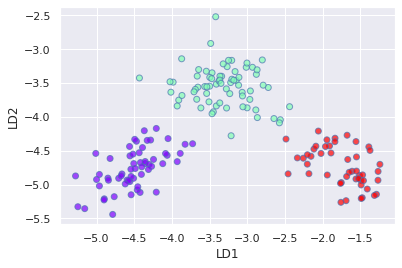

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [ ]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

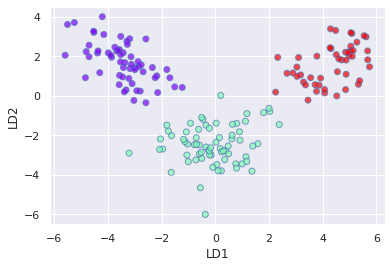

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)